<a href="https://colab.research.google.com/github/vinothkumarpy/PIZCARDX/blob/main/bizcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
!pip install db-sqlite3

In [31]:
!pip install easyocr

Saving 1.png to 1.png
Selva
DATA MANAGER
+123-456-7890
+123-456-7891
WWW XYZI.com
hello@XYZ1.com
123 ABC St , Chennai;
selva
TamilNadu 600113
digitals


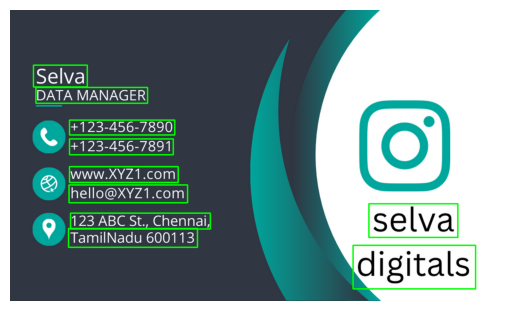

In [32]:
import cv2
import easyocr
import matplotlib.pyplot as plt
from google.colab import files
import pandas as pd

reader = easyocr.Reader(['en'])

uploaded = files.upload()



uploaded_file_name = list(uploaded.keys())[0]

image = cv2.imread(uploaded_file_name)

result = reader.readtext(image)

for detection in result:
    text = detection[1]
    box = detection[0]


    top_left = tuple(map(int, box[0]))
    bottom_right = tuple(map(int, box[2]))


    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)

    print(text)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


**##### convert the extracted data into list**

In [33]:
import pandas as pd
extracted_text_list = [detection[1] for detection in result]

extracted_text_list

['Selva',
 'DATA MANAGER',
 '+123-456-7890',
 '+123-456-7891',
 'WWW XYZI.com',
 'hello@XYZ1.com',
 '123 ABC St , Chennai;',
 'selva',
 'TamilNadu 600113',
 'digitals']

**##### convet the list into DataFrame with category**

In [44]:
df = pd.DataFrame(extracted_text_list, columns=['Data'])
real_data = df.transpose()
print(real_data)

          0             1              2              3             4  \
Data  Selva  DATA MANAGER  +123-456-7890  +123-456-7891  WWW XYZI.com   

                   5                      6      7                 8         9  
Data  hello@XYZ1.com  123 ABC St , Chennai;  selva  TamilNadu 600113  digitals  


**### modify the extracted data**

In [35]:
import pandas as pd

extracted_text_list = extracted_text_list

modified_data = df.transpose()

while True:
    name_to_replace = input("Enter the name to replace (or 'done' to finish): ")
    if name_to_replace.lower() == 'done':
        break

    new_name = input("Enter the new name: ")

    modified_data.loc['Data'] = real_data.loc['Data'].replace(name_to_replace, new_name)

print(modified_data)


Enter the name to replace (or 'done' to finish): Selva
Enter the new name: vinoth
Enter the name to replace (or 'done' to finish): done
           0             1              2              3             4  \
Data  vinoth  DATA MANAGER  +123-456-7890  +123-456-7891  WWW XYZI.com   

                   5                      6      7                 8         9  
Data  hello@XYZ1.com  123 ABC St , Chennai;  selva  TamilNadu 600113  digitals  


In [36]:
modified_data

,0,1,2,3,4,5,6,7,8,9
Data,vinoth,DATA MANAGER,+123-456-7890,+123-456-7891,WWW XYZI.com,hello@XYZ1.com,"123 ABC St , Chennai;",selva,TamilNadu 600113,digitals


**### insert or store the dataframe into sqlite database**

In [46]:
import sqlite3
import pandas as pd
conn = sqlite3.connect('bizcard.db')

real_data.to_sql('real_data', conn, if_exists='replace', index=False)

modified_data.to_sql('modified_data', conn, if_exists='replace', index=False)

conn.commit()
conn.close()

print("Two DataFrames inserted into separate tables in the database.")


Two DataFrames inserted into separate tables in the database.


**### Fetch the inserted data in sqlite**

In [51]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('bizcard.db')

query = "SELECT * FROM real_data"

df_org = pd.read_sql_query(query, conn)

conn.close()

print(df_org)


       0             1              2              3             4  \
0  Selva  DATA MANAGER  +123-456-7890  +123-456-7891  WWW XYZI.com   

                5                      6      7                 8         9  
0  hello@XYZ1.com  123 ABC St , Chennai;  selva  TamilNadu 600113  digitals  


In [52]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('bizcard.db')

query = "SELECT * FROM modified_data"

df_org = pd.read_sql_query(query, conn)

conn.close()
print(df_org)


        0             1              2              3             4  \
0  vinoth  DATA MANAGER  +123-456-7890  +123-456-7891  WWW XYZI.com   

                5                      6      7                 8         9  
0  hello@XYZ1.com  123 ABC St , Chennai;  selva  TamilNadu 600113  digitals  
